## Data Mining and Machine Learning
### Clasification using Neural Networks and Deep Learning
#### Edgar Acuna 
#### January 2022
#### Datasets:  Toy example, Diabetes, Landsat and, Shuttle

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### Example 1. Neural Nets applied to the prediction of the final grade based on the first two exams: E1 and E2

In [2]:
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")
#df=pd.read_csv("c://PW-PR/eje1dis.csv")

In [3]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.to_numpy()
X1=X.to_numpy()
#scaler = StandardScaler()
#scaler.fit(X1)
#StandardScaler(copy=True, with_mean=True, with_std=True)
#X1= scaler.transform(X1)

In [4]:
#Training a neural net with one hidden layer containing 5 units
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5),max_iter=1000,random_state=99)
mlp.fit(X1, y) 

MLPClassifier(hidden_layer_sizes=5, max_iter=1000, random_state=99,
              solver='lbfgs')

In [5]:
#Showing  the weights
mlp.coefs_

[array([[-1.92864728e+01, -2.19842012e-02,  4.66125907e+01,
         -1.21214465e+01, -1.66607565e+01],
        [ 9.29670838e+01, -3.73197174e-01,  4.15534374e+01,
         -1.23326054e+01, -3.20080488e+00]]),
 array([[-7.18327688e-04],
        [ 9.44034376e-01],
        [ 1.11408734e-02],
        [ 1.96769231e+00],
        [-1.39385187e+00]])]

In [6]:
#Showing the biases
mlp.intercepts_

[array([-7.47103877,  0.45692388,  1.40033409, -0.1631209 ,  0.57263237]),
 array([-51.63127073])]

In [7]:
#Calculating the posterior probabilities
mlp.predict_proba(X1)

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [2.44249065e-15, 1.00000000e+00],
       [5.85846927e-10, 9.99999999e-01],
       [1.03517195e-12, 1.00000000e+00],
       [3.92923316e-09, 9.99999996e-01],
       [2.20558634e-08, 9.99999978e-01],
       [1.10431594e-07, 9.99999890e-01],
       [5.66857183e-09, 9.99999994e-01],
       [8.18679409e-04, 9.99181321e-01],
       [1.65271638e-03, 9.98347284e-01],
       [2.31305419e-10, 1.00000000e+00],
       [1.06298526e-10, 1.00000000e+00],
       [3.11181433e-01, 6.88818567e-01],
       [8.12597403e-06, 9.99991874e-01],
       [3.51924666e-06, 9.99996481e-01],
       [2.62822209e-02, 9.73717779e-01],
       [1.15113613e-04, 9.99884886e-01],
       [1.78346920e-01, 8.21653080e-01],
       [2.22614061e-02, 9.77738594e-01],
       [1.61208501e-04, 9.99838791e-01],
       [5.07604815e-07, 9.99999492e-01],
       [9.933556

In [8]:
#Calculating the prediction matrix
pred=mlp.predict(X1)
print(confusion_matrix(y,pred))

[[ 8  0]
 [ 0 24]]


In [9]:
#Calculating the number of errors
error=(y!=pred).sum()
print( "Este es el numero de errores=", error)

Este es el numero de errores= 0


In [10]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           f       1.00      1.00      1.00         8
           p       1.00      1.00      1.00        24

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



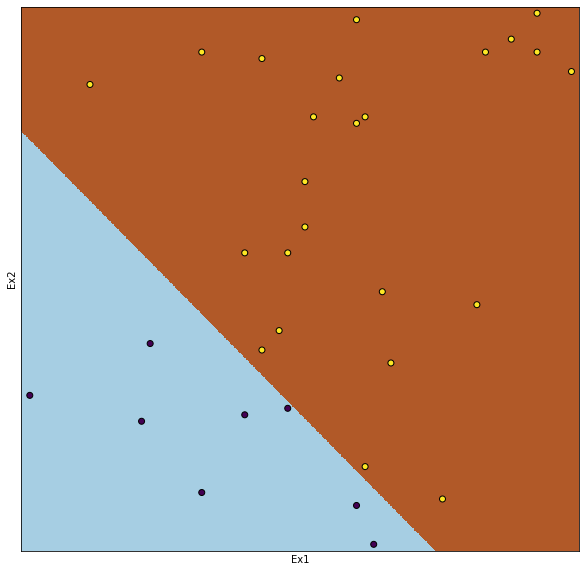

In [11]:
#Visualizando la fromtera de decision
from matplotlib.colors import ListedColormap
mlp = MLPClassifier(solver="lbfgs",hidden_layer_sizes=(5),max_iter=1000,random_state=99)
mlp.fit(X1, y1) 
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=mlp.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()


In [12]:
#Estimating the accuracy using cross validation(5-neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.9


In [13]:
#Training a neural net with two hidden layers containing 5 units each of them
mlp2 = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5,5),max_iter=1000,random_state=99)
mlp2.fit(X1, y) 

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000, random_state=99,
              solver='lbfgs')

In [14]:
#Showing  the weights
mlp2.coefs_

[array([[-0.23049524, -0.02207448,  0.63049713, -0.64444712,  0.36133947],
        [-0.39755451, -0.37472974, -0.81520733,  1.16250735, -0.9975528 ]]),
 array([[-0.16196165,  0.52198852,  0.36004258, -0.62957092,  0.28294691],
        [-0.44665223,  0.084192  , -0.32181481,  0.48976489,  0.50820058],
        [-0.43132982,  0.14973231, -0.62677501, -0.13685051, -0.6418174 ],
        [-0.55149494, -0.49373762,  0.0625446 , -0.65435683, -0.45661181],
        [-0.76444363,  0.58263972,  0.0809211 , -0.51503376,  0.65182766]]),
 array([[ 0.66983668],
        [-0.0825381 ],
        [ 0.94532955],
        [-0.06752363],
        [-0.30298109]])]

In [15]:
#Showing  the biases
mlp2.intercepts_

[array([ 0.49242105,  0.45692388, -0.22506937, -0.00865967,  0.7918344 ]),
 array([ 0.06520198, -0.71764652,  0.03837523,  0.21710789,  0.4598108 ]),
 array([0.11201181])]

The model has 51 parameters

In [16]:
#Calculating the prediction matrix
pred=mlp2.predict(X1)
print(confusion_matrix(y,pred))

[[ 3  5]
 [ 2 22]]


There are 7 errors

In [17]:
#Estimating the accuracy using cross validation(5-neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp2, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.7083333333333333


### Example 2. Nnets applied to Diabetes

In [18]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
#url="c://PW-PR/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


#### Splitting the data in training(70%) and test (30%) datasets

In [19]:
y=data['class']
X=data.iloc[:,0:8]
X_train, X_test, y_train, y_test = train_test_split(X, y)
y1=y.to_numpy()
X1=X.to_numpy()
#scaler = StandardScaler()
#scaler.fit(X_train)
#StandardScaler(copy=True, with_mean=True, with_std=True)
#X_train= scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [20]:
#training a NN with one hidden layer and 20 units
mlp=MLPClassifier(hidden_layer_sizes=(20),max_iter=500)
mlp.fit(X_train, y_train) 

MLPClassifier(hidden_layer_sizes=20, max_iter=500)

In [21]:
#mlp.coefs_

In [22]:
mlp.intercepts_

[array([ 0.53514047, -0.19392137,  0.00720215,  0.06733749,  0.6636554 ,
        -0.45602996, -0.13969818, -0.33559076,  0.02849175, -0.64454282,
        -0.65759687, -0.32082036, -0.97035149, -0.73627076,  0.20789378,
        -0.07544847, -0.09854959, -0.55003839,  0.02446648,  0.23521581]),
 array([-0.95051453])]

The model has 201 parameters

In [23]:
pred=mlp.predict(X_test)

In [24]:
#Estimacion del error usando Training y test datasets
mlp.score(X_test, y_test)

0.6822916666666666

In [25]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.72      0.81      0.77       123
           2       0.57      0.45      0.50        69

    accuracy                           0.68       192
   macro avg       0.65      0.63      0.64       192
weighted avg       0.67      0.68      0.67       192



In [26]:
#Estimating the accuracy using cross validation( 20 neurons)
from sklearn.model_selection import cross_val_score
mlp=MLPClassifier(hidden_layer_sizes=(20),max_iter=500)
mlp.fit(X1, y1) 
scores = cross_val_score(mlp, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.6991455912508544


#### The overfitting problem in Neural Nets 

In [27]:
#Training a NN with one hidden layer and 20 units
mlp1=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5),max_iter=5000,random_state=90)
mlp1.fit(X1, y1) 
mlp1.score(X1, y1)

0.6848958333333334

In [28]:
#Training a NN with one hidden layer and 20 units
mlp2=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),max_iter=5000)
mlp2.fit(X1, y1) 
mlp2.score(X1, y1)

0.8059895833333334

In [29]:
#Training a NN with one hidden layer and 50 units
mlp3=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(50),max_iter=5000)
mlp3.fit(X1, y1) 
mlp3.score(X1, y1)

0.8684895833333334

In [30]:
#Training a NN with one hidden layer and 100 units
mlp4=MLPClassifier(hidden_layer_sizes=(500),max_iter=5000)
mlp4.fit(X1, y1) 
mlp4.score(X1, y1)

0.7669270833333334

In [31]:
#Training a NN with one hidden layer and 200 units
mlp5=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20,20),max_iter=5000)
mlp5.fit(X1, y1) 
mlp5.score(X1, y1)

0.8541666666666666

In [32]:
#Training a NN with one hidden layer and 500 units
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(500),max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

1.0

In [33]:
#Training a NN with one hidden layer and 20 units, weight decay with penalty .1
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),alpha=.1,max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

0.82421875

In [34]:
#Training a NN with one hidden layer and 20 units, weight decay with penalty 5
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),alpha=5,max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

0.8307291666666666

In [35]:
#training a NN with two hidden layer and 20 units in each of them
mlp22=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20,20),max_iter=5000)
mlp22.fit(X1, y1) 
mlp22.score(X1, y1)

0.8815104166666666

In [36]:
#Estimating the accuracy using cross validation(5-neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp1, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.713773069036227


In [37]:
#Estimating the accuracy using cross validation(20 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp2, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.7500341763499658


In [38]:
#Estimating the accuracy using cross validation(50 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp3, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.709688995215311


In [39]:
#Estimating the accuracy using cross validation(100 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp4, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.6861414900888585


### Example 3. Nnet  applied to Landsat 

In [40]:
#Cargando el conjunto de datos Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
#url='c://PW-PR/landsat.data'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
#Holdout estimacion of teh accuracy  with  3 layers and 50 nuronss in each of them
X_train, X_test, y_train, y_test = train_test_split(X, y)
mlp=MLPClassifier(hidden_layer_sizes=(50,50,50),max_iter=500)
mlp.fit(X_train, y_train) 
mlp.fit(X_train, y_train) 

MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=500)

In [42]:
pred=mlp.predict(X_test)
print(confusion_matrix(y_test, pred))

[[275   0   9   0   0   0]
 [  1  96   0   1   1   0]
 [  2   0 226  10   0   4]
 [  0   1  53  28   1  12]
 [ 14   1   0   1  81  18]
 [  0   0  43  27   3 201]]


In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.94      0.97      0.95       284
           2       0.98      0.97      0.97        99
           3       0.68      0.93      0.79       242
           4       0.42      0.29      0.35        95
           5       0.94      0.70      0.81       115
           6       0.86      0.73      0.79       274

    accuracy                           0.82      1109
   macro avg       0.80      0.77      0.78      1109
weighted avg       0.82      0.82      0.81      1109



### IV. Ejemplo de Deep Learning aplicado a Diabetes

In [44]:
import h2o
h2o.init(ip="localhost", port=54323)
from h2o.estimators.deeplearning import  H2ODeepLearningEstimator
#h2o.connect()
#h2o.no_progress()

Checking whether there is an H2O instance running at http://localhost:54323 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.231-b11, mixed mode)
  Starting server from C:\Users\eacun\anaconda38\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\eacun\AppData\Local\Temp\tmpc8x98oi7
  JVM stdout: C:\Users\eacun\AppData\Local\Temp\tmpc8x98oi7\h2o_eacun_started_from_python.out
  JVM stderr: C:\Users\eacun\AppData\Local\Temp\tmpc8x98oi7\h2o_eacun_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Halifax
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,3 months and 19 days !!!
H2O_cluster_name:,H2O_from_python_eacun_o9g4ni
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,241.2 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [45]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
dl_model = H2ODeepLearningEstimator(hidden=[10,10],epochs=200)
dl_model.train(myx, myy, training_frame=diabetes)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1643287712711_1


Status of Neuron Layers: predicting C9, 2-class classification, bernoulli distribution, CrossEntropy loss, 222 weights/biases, 6.8 KB, 153,600 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,8,Input,0.0,,,,,,,,,
1,,2,10,Rectifier,0.0,0.0,0.0,0.000732,0.000295,0.0,-0.096904,0.414261,0.465704,0.246017
2,,3,10,Rectifier,0.0,0.0,0.0,0.001266,0.001459,0.0,-0.061977,0.411515,1.057842,0.12167
3,,4,2,Softmax,,0.0,0.0,0.001598,0.000843,0.0,0.261305,1.694019,0.011583,0.074679




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.1282827660198073
RMSE: 0.35816583591935075
LogLoss: 0.39647701606306107
Mean Per-Class Error: 0.16549253731343283
AUC: 0.9110858208955224
AUCPR: 0.8460883673516572
Gini: 0.8221716417910447

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.631365088497309: 


,,1,2,Error,Rate
0,1,435.0,65.0,0.13,(65.0/500.0)
1,2,54.0,214.0,0.2015,(54.0/268.0)
2,Total,489.0,279.0,0.1549,(119.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.631365,0.782450,150.0
1,max f2,0.274863,0.851343,266.0
2,max f0point5,0.757747,0.795848,109.0
3,max accuracy,0.668743,0.845052,136.0
4,max precision,0.999387,1.000000,0.0
5,max recall,0.033255,1.000000,371.0
6,max specificity,0.999387,1.000000,0.0
7,max absolute_mcc,0.631365,0.662525,150.0
8,max min_per_class_accuracy,0.573593,0.828358,167.0
9,max mean_per_class_accuracy,0.557866,0.834507,171.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 44.77 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,0.996849,2.865672,2.865672,1.000000,0.998106,1.000000,0.998106,0.029851,0.029851,186.567164,186.567164,0.029851
1,2,0.020833,0.991375,2.865672,2.865672,1.000000,0.995147,1.000000,0.996627,0.029851,0.059701,186.567164,186.567164,0.059701
2,3,0.031250,0.986905,2.865672,2.865672,1.000000,0.989521,1.000000,0.994258,0.029851,0.089552,186.567164,186.567164,0.089552
3,4,0.040365,0.983163,2.456290,2.773231,0.857143,0.985232,0.967742,0.992220,0.022388,0.111940,145.628998,177.323062,0.109940
4,5,0.050781,0.976371,2.507463,2.718714,0.875000,0.979215,0.948718,0.989552,0.026119,0.138060,150.746269,171.871412,0.134060
5,6,0.100260,0.938832,2.714847,2.716806,0.947368,0.958522,0.948052,0.974238,0.134328,0.272388,171.484682,171.680558,0.264388
6,7,0.151042,0.896605,2.498278,2.643335,0.871795,0.913793,0.922414,0.953916,0.126866,0.399254,149.827784,164.333505,0.381254
7,8,0.200521,0.841963,1.885310,2.456290,0.657895,0.867526,0.857143,0.932599,0.093284,0.492537,88.531029,145.628998,0.448537
8,9,0.300781,0.738800,2.046908,2.319829,0.714286,0.795160,0.809524,0.886786,0.205224,0.697761,104.690832,131.982942,0.609761
9,10,0.399740,0.572399,1.319717,2.072245,0.460526,0.653191,0.723127,0.828958,0.130597,0.828358,31.971720,107.224464,0.658358




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-01-27 08:48:38,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-01-27 08:48:41,2.869 sec,128000 obs/sec,10.0,1,7680.0,0.397777,0.483138,0.303540,0.841321,0.733271,2.507463,0.236979
2,,2022-01-27 08:48:42,3.286 sec,333188 obs/sec,200.0,20,153600.0,0.358166,0.396477,0.435341,0.911086,0.846088,2.865672,0.154948



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C8,1.000000,1.000000,0.159956
1,C4,0.966389,0.966389,0.154580
2,C1,0.898682,0.898682,0.143750
3,C6,0.891870,0.891870,0.142660
4,C2,0.706706,0.706706,0.113042
5,C7,0.690619,0.690619,0.110469
6,C3,0.575255,0.575255,0.092016
7,C5,0.522195,0.522195,0.083528


In [46]:
y_pred=dl_model.predict(diabetes)
print( (y_pred['predict']==diabetes['C9']).mean())

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
[0.8450520833333334]


In [47]:
dl_model.model_performance(diabetes)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.1282827660198075
RMSE: 0.3581658359193511
LogLoss: 0.3964770160630607
Mean Per-Class Error: 0.16549253731343283
AUC: 0.9111082089552238
AUCPR: 0.8461371143254146
Gini: 0.8222164179104476

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.631365088497309: 


,,1,2,Error,Rate
0,1,435.0,65.0,0.13,(65.0/500.0)
1,2,54.0,214.0,0.2015,(54.0/268.0)
2,Total,489.0,279.0,0.1549,(119.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.631365,0.782450,151.0
1,max f2,0.275466,0.851900,266.0
2,max f0point5,0.757747,0.795848,110.0
3,max accuracy,0.668743,0.845052,137.0
4,max precision,0.999387,1.000000,0.0
5,max recall,0.033255,1.000000,370.0
6,max specificity,0.999387,1.000000,0.0
7,max absolute_mcc,0.631365,0.662525,151.0
8,max min_per_class_accuracy,0.573593,0.828358,168.0
9,max mean_per_class_accuracy,0.557866,0.834507,172.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 44.77 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,0.996849,2.865672,2.865672,1.000000,0.998106,1.000000,0.998106,0.029851,0.029851,186.567164,186.567164,0.029851
1,2,0.020833,0.991375,2.865672,2.865672,1.000000,0.995147,1.000000,0.996627,0.029851,0.059701,186.567164,186.567164,0.059701
2,3,0.031250,0.986905,2.865672,2.865672,1.000000,0.989521,1.000000,0.994258,0.029851,0.089552,186.567164,186.567164,0.089552
3,4,0.040365,0.983163,2.456290,2.773231,0.857143,0.985232,0.967742,0.992220,0.022388,0.111940,145.628998,177.323062,0.109940
4,5,0.050781,0.976371,2.507463,2.718714,0.875000,0.979215,0.948718,0.989552,0.026119,0.138060,150.746269,171.871412,0.134060
5,6,0.100260,0.938832,2.714847,2.716806,0.947368,0.958522,0.948052,0.974238,0.134328,0.272388,171.484682,171.680558,0.264388
6,7,0.151042,0.896605,2.498278,2.643335,0.871795,0.913793,0.922414,0.953916,0.126866,0.399254,149.827784,164.333505,0.381254
7,8,0.200521,0.841963,1.885310,2.456290,0.657895,0.867526,0.857143,0.932599,0.093284,0.492537,88.531029,145.628998,0.448537
8,9,0.300781,0.738800,2.046908,2.319829,0.714286,0.795160,0.809524,0.886786,0.205224,0.697761,104.690832,131.982942,0.609761
9,10,0.399740,0.572399,1.319717,2.072245,0.460526,0.653191,0.723127,0.828958,0.130597,0.828358,31.971720,107.224464,0.658358


In [48]:
dl_model1 = H2ODeepLearningEstimator(hidden=[20,20,20],epochs=500,nfolds=10)
dl_model1.train(myx, myy, training_frame=diabetes)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1643287712711_5


Status of Neuron Layers: predicting C9, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,062 weights/biases, 17.7 KB, 391,680 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,8,Input,0.0,,,,,,,,,
1,,2,20,Rectifier,0.0,0.0,0.0,0.000781,0.000408,0.0,0.017159,0.455229,0.56551,0.291798
2,,3,20,Rectifier,0.0,0.0,0.0,0.000866,0.000701,0.0,0.004647,0.36472,0.952116,0.186483
3,,4,20,Rectifier,0.0,0.0,0.0,0.001256,0.003443,0.0,-0.008667,0.370226,1.015271,0.045384
4,,5,2,Softmax,,0.0,0.0,0.008263,0.028954,0.0,-0.086044,1.730891,0.005681,0.033852




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.02612972061313125
RMSE: 0.16164690103163515
LogLoss: 0.08930804248881051
Mean Per-Class Error: 0.03279104477611949
AUC: 0.9947425373134329
AUCPR: 0.990300580944054
Gini: 0.9894850746268657

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41831393252211946: 


,,1,2,Error,Rate
0,1,487.0,13.0,0.026,(13.0/500.0)
1,2,11.0,257.0,0.041,(11.0/268.0)
2,Total,498.0,270.0,0.0312,(24.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,4.183139e-01,0.955390,167.0
1,max f2,3.311962e-01,0.962963,175.0
2,max f0point5,7.873405e-01,0.963050,148.0
3,max accuracy,4.183139e-01,0.968750,167.0
4,max precision,9.999991e-01,1.000000,0.0
5,max recall,8.329012e-02,1.000000,221.0
6,max specificity,9.999991e-01,1.000000,0.0
7,max absolute_mcc,4.183139e-01,0.931358,167.0
8,max min_per_class_accuracy,3.431272e-01,0.966418,172.0
9,max mean_per_class_accuracy,3.431272e-01,0.967209,172.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 35.22 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,1.000000e+00,2.865672,2.865672,1.000000,1.000000e+00,1.000000,1.000000,0.029851,0.029851,186.567164,186.567164,0.029851
1,2,0.020833,1.000000e+00,2.865672,2.865672,1.000000,1.000000e+00,1.000000,1.000000,0.029851,0.059701,186.567164,186.567164,0.059701
2,3,0.031250,9.999993e-01,2.865672,2.865672,1.000000,9.999997e-01,1.000000,1.000000,0.029851,0.089552,186.567164,186.567164,0.089552
3,4,0.040365,9.999981e-01,2.865672,2.865672,1.000000,9.999986e-01,1.000000,1.000000,0.026119,0.115672,186.567164,186.567164,0.115672
4,5,0.050781,9.999935e-01,2.865672,2.865672,1.000000,9.999961e-01,1.000000,0.999999,0.029851,0.145522,186.567164,186.567164,0.145522
5,6,0.100260,9.997993e-01,2.865672,2.865672,1.000000,9.999328e-01,1.000000,0.999966,0.141791,0.287313,186.567164,186.567164,0.287313
6,7,0.151042,9.982501e-01,2.865672,2.865672,1.000000,9.991866e-01,1.000000,0.999704,0.145522,0.432836,186.567164,186.567164,0.432836
7,8,0.200521,9.913555e-01,2.865672,2.865672,1.000000,9.960949e-01,1.000000,0.998814,0.141791,0.574627,186.567164,186.567164,0.574627
8,9,0.300781,8.852683e-01,2.754022,2.828455,0.961039,9.590476e-01,0.987013,0.985558,0.276119,0.850746,175.402210,182.845513,0.844746
9,10,0.399740,1.267337e-01,1.357423,2.464291,0.473684,4.981910e-01,0.859935,0.864907,0.134328,0.985075,35.742341,146.429092,0.899075




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.18557282899266003
RMSE: 0.43078164885781756
LogLoss: 0.5899797362724003
Mean Per-Class Error: 0.26116417910447765
AUC: 0.813231343283582
AUCPR: 0.6702630601851225
Gini: 0.6264626865671641

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2631085989037076: 


,,1,2,Error,Rate
0,1,306.0,194.0,0.388,(194.0/500.0)
1,2,36.0,232.0,0.1343,(36.0/268.0)
2,Total,342.0,426.0,0.2995,(230.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.263109,0.668588,260.0
1,max f2,0.162637,0.796403,302.0
2,max f0point5,0.742438,0.652174,113.0
3,max accuracy,0.742438,0.753906,113.0
4,max precision,0.999610,1.000000,0.0
5,max recall,0.000789,1.000000,398.0
6,max specificity,0.999610,1.000000,0.0
7,max absolute_mcc,0.209738,0.459263,280.0
8,max min_per_class_accuracy,0.499123,0.731343,190.0
9,max mean_per_class_accuracy,0.263109,0.738836,260.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 42.46 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,0.998113,2.507463,2.507463,0.875000,0.999017,0.875000,0.999017,0.026119,0.026119,150.746269,150.746269,0.024119
1,2,0.020833,0.995895,1.791045,2.149254,0.625000,0.996810,0.750000,0.997914,0.018657,0.044776,79.104478,114.925373,0.036776
2,3,0.031250,0.989638,2.149254,2.149254,0.750000,0.992599,0.750000,0.996142,0.022388,0.067164,114.925373,114.925373,0.055164
3,4,0.040365,0.981775,2.456290,2.218584,0.857143,0.984585,0.774194,0.993532,0.022388,0.089552,145.628998,121.858450,0.075552
4,5,0.050781,0.978738,2.865672,2.351320,1.000000,0.980193,0.820513,0.990796,0.029851,0.119403,186.567164,135.132032,0.105403
5,6,0.100260,0.948802,1.960723,2.158558,0.684211,0.962808,0.753247,0.976984,0.097015,0.216418,96.072270,115.855786,0.178418
6,7,0.151042,0.900141,2.204363,2.173958,0.769231,0.923375,0.758621,0.958960,0.111940,0.328358,120.436280,117.395780,0.272358
7,8,0.200521,0.856594,1.583661,2.028300,0.552632,0.880541,0.707792,0.939610,0.078358,0.406716,58.366064,102.830006,0.316716
8,9,0.300781,0.708743,1.674743,1.910448,0.584416,0.773719,0.666667,0.884313,0.167910,0.574627,67.474317,91.044776,0.420627
9,10,0.399740,0.558989,1.206599,1.736205,0.421053,0.635798,0.605863,0.822791,0.119403,0.694030,20.659859,73.620497,0.452030




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.765570,0.056987,0.727273,0.831325,0.773810,0.835616,0.714286,0.779412,0.695652,0.734043,0.850000,0.714286
1,auc,0.812853,0.041880,0.782520,0.843137,0.847059,0.854396,0.783932,0.815625,0.756969,0.821792,0.870720,0.752381
2,err,0.234430,0.056987,0.272727,0.168675,0.226190,0.164384,0.285714,0.220588,0.304348,0.265957,0.150000,0.285714
3,err_count,17.900000,4.771443,21.000000,14.000000,19.000000,12.000000,24.000000,15.000000,21.000000,25.000000,12.000000,16.000000
4,f0point5,0.656964,0.067163,0.687500,0.555556,0.700935,0.702479,0.616114,0.625000,0.625000,0.638298,0.798319,0.620438
5,f1,0.705384,0.050338,0.758621,0.611111,0.759494,0.739130,0.684211,0.651163,0.704225,0.705882,0.760000,0.680000
6,f2,0.765588,0.057380,0.846154,0.679012,0.828729,0.779817,0.769231,0.679612,0.806452,0.789474,0.725191,0.752212
7,lift_top_group,2.784164,1.367557,2.138889,5.533333,2.470588,3.476191,2.709678,3.400000,2.464286,2.685714,2.962963,0.000000
8,logloss,0.599020,0.126519,0.603532,0.437053,0.512071,0.824732,0.663020,0.587051,0.657813,0.533820,0.432268,0.738839
9,max_per_class_error,0.327182,0.075399,0.439024,0.266667,0.300000,0.190476,0.358491,0.300000,0.439024,0.338983,0.296296,0.342857



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-01-27 08:49:51,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-01-27 08:49:51,35.534 sec,97215 obs/sec,10.0,1,7680.0,0.398919,0.482585,0.299533,0.863179,0.762012,2.865672,0.242188
2,,2022-01-27 08:49:54,38.740 sec,119596 obs/sec,510.0,51,391680.0,0.161647,0.089308,0.884986,0.994743,0.990301,2.865672,0.031250



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C2,1.000000,1.000000,0.146412
1,C5,0.939659,0.939659,0.137578
2,C3,0.935611,0.935611,0.136985
3,C6,0.808888,0.808888,0.118431
4,C7,0.801884,0.801884,0.117406
5,C4,0.789084,0.789084,0.115532
6,C1,0.780207,0.780207,0.114232
7,C8,0.774691,0.774691,0.113424


In [49]:
dl_model1.confusion_matrix

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1643287712711_5


Status of Neuron Layers: predicting C9, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,062 weights/biases, 17.7 KB, 391,680 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,8,Input,0.0,,,,,,,,,
1,,2,20,Rectifier,0.0,0.0,0.0,0.000781,0.000408,0.0,0.017159,0.455229,0.56551,0.291798
2,,3,20,Rectifier,0.0,0.0,0.0,0.000866,0.000701,0.0,0.004647,0.36472,0.952116,0.186483
3,,4,20,Rectifier,0.0,0.0,0.0,0.001256,0.003443,0.0,-0.008667,0.370226,1.015271,0.045384
4,,5,2,Softmax,,0.0,0.0,0.008263,0.028954,0.0,-0.086044,1.730891,0.005681,0.033852




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.02612972061313125
RMSE: 0.16164690103163515
LogLoss: 0.08930804248881051
Mean Per-Class Error: 0.03279104477611949
AUC: 0.9947425373134329
AUCPR: 0.990300580944054
Gini: 0.9894850746268657

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41831393252211946: 


,,1,2,Error,Rate
0,1,487.0,13.0,0.026,(13.0/500.0)
1,2,11.0,257.0,0.041,(11.0/268.0)
2,Total,498.0,270.0,0.0312,(24.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,4.183139e-01,0.955390,167.0
1,max f2,3.311962e-01,0.962963,175.0
2,max f0point5,7.873405e-01,0.963050,148.0
3,max accuracy,4.183139e-01,0.968750,167.0
4,max precision,9.999991e-01,1.000000,0.0
5,max recall,8.329012e-02,1.000000,221.0
6,max specificity,9.999991e-01,1.000000,0.0
7,max absolute_mcc,4.183139e-01,0.931358,167.0
8,max min_per_class_accuracy,3.431272e-01,0.966418,172.0
9,max mean_per_class_accuracy,3.431272e-01,0.967209,172.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 35.22 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,1.000000e+00,2.865672,2.865672,1.000000,1.000000e+00,1.000000,1.000000,0.029851,0.029851,186.567164,186.567164,0.029851
1,2,0.020833,1.000000e+00,2.865672,2.865672,1.000000,1.000000e+00,1.000000,1.000000,0.029851,0.059701,186.567164,186.567164,0.059701
2,3,0.031250,9.999993e-01,2.865672,2.865672,1.000000,9.999997e-01,1.000000,1.000000,0.029851,0.089552,186.567164,186.567164,0.089552
3,4,0.040365,9.999981e-01,2.865672,2.865672,1.000000,9.999986e-01,1.000000,1.000000,0.026119,0.115672,186.567164,186.567164,0.115672
4,5,0.050781,9.999935e-01,2.865672,2.865672,1.000000,9.999961e-01,1.000000,0.999999,0.029851,0.145522,186.567164,186.567164,0.145522
5,6,0.100260,9.997993e-01,2.865672,2.865672,1.000000,9.999328e-01,1.000000,0.999966,0.141791,0.287313,186.567164,186.567164,0.287313
6,7,0.151042,9.982501e-01,2.865672,2.865672,1.000000,9.991866e-01,1.000000,0.999704,0.145522,0.432836,186.567164,186.567164,0.432836
7,8,0.200521,9.913555e-01,2.865672,2.865672,1.000000,9.960949e-01,1.000000,0.998814,0.141791,0.574627,186.567164,186.567164,0.574627
8,9,0.300781,8.852683e-01,2.754022,2.828455,0.961039,9.590476e-01,0.987013,0.985558,0.276119,0.850746,175.402210,182.845513,0.844746
9,10,0.399740,1.267337e-01,1.357423,2.464291,0.473684,4.981910e-01,0.859935,0.864907,0.134328,0.985075,35.742341,146.429092,0.899075




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.18557282899266003
RMSE: 0.43078164885781756
LogLoss: 0.5899797362724003
Mean Per-Class Error: 0.26116417910447765
AUC: 0.813231343283582
AUCPR: 0.6702630601851225
Gini: 0.6264626865671641

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2631085989037076: 


,,1,2,Error,Rate
0,1,306.0,194.0,0.388,(194.0/500.0)
1,2,36.0,232.0,0.1343,(36.0/268.0)
2,Total,342.0,426.0,0.2995,(230.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.263109,0.668588,260.0
1,max f2,0.162637,0.796403,302.0
2,max f0point5,0.742438,0.652174,113.0
3,max accuracy,0.742438,0.753906,113.0
4,max precision,0.999610,1.000000,0.0
5,max recall,0.000789,1.000000,398.0
6,max specificity,0.999610,1.000000,0.0
7,max absolute_mcc,0.209738,0.459263,280.0
8,max min_per_class_accuracy,0.499123,0.731343,190.0
9,max mean_per_class_accuracy,0.263109,0.738836,260.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 42.46 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,0.998113,2.507463,2.507463,0.875000,0.999017,0.875000,0.999017,0.026119,0.026119,150.746269,150.746269,0.024119
1,2,0.020833,0.995895,1.791045,2.149254,0.625000,0.996810,0.750000,0.997914,0.018657,0.044776,79.104478,114.925373,0.036776
2,3,0.031250,0.989638,2.149254,2.149254,0.750000,0.992599,0.750000,0.996142,0.022388,0.067164,114.925373,114.925373,0.055164
3,4,0.040365,0.981775,2.456290,2.218584,0.857143,0.984585,0.774194,0.993532,0.022388,0.089552,145.628998,121.858450,0.075552
4,5,0.050781,0.978738,2.865672,2.351320,1.000000,0.980193,0.820513,0.990796,0.029851,0.119403,186.567164,135.132032,0.105403
5,6,0.100260,0.948802,1.960723,2.158558,0.684211,0.962808,0.753247,0.976984,0.097015,0.216418,96.072270,115.855786,0.178418
6,7,0.151042,0.900141,2.204363,2.173958,0.769231,0.923375,0.758621,0.958960,0.111940,0.328358,120.436280,117.395780,0.272358
7,8,0.200521,0.856594,1.583661,2.028300,0.552632,0.880541,0.707792,0.939610,0.078358,0.406716,58.366064,102.830006,0.316716
8,9,0.300781,0.708743,1.674743,1.910448,0.584416,0.773719,0.666667,0.884313,0.167910,0.574627,67.474317,91.044776,0.420627
9,10,0.399740,0.558989,1.206599,1.736205,0.421053,0.635798,0.605863,0.822791,0.119403,0.694030,20.659859,73.620497,0.452030




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.765570,0.056987,0.727273,0.831325,0.773810,0.835616,0.714286,0.779412,0.695652,0.734043,0.850000,0.714286
1,auc,0.812853,0.041880,0.782520,0.843137,0.847059,0.854396,0.783932,0.815625,0.756969,0.821792,0.870720,0.752381
2,err,0.234430,0.056987,0.272727,0.168675,0.226190,0.164384,0.285714,0.220588,0.304348,0.265957,0.150000,0.285714
3,err_count,17.900000,4.771443,21.000000,14.000000,19.000000,12.000000,24.000000,15.000000,21.000000,25.000000,12.000000,16.000000
4,f0point5,0.656964,0.067163,0.687500,0.555556,0.700935,0.702479,0.616114,0.625000,0.625000,0.638298,0.798319,0.620438
5,f1,0.705384,0.050338,0.758621,0.611111,0.759494,0.739130,0.684211,0.651163,0.704225,0.705882,0.760000,0.680000
6,f2,0.765588,0.057380,0.846154,0.679012,0.828729,0.779817,0.769231,0.679612,0.806452,0.789474,0.725191,0.752212
7,lift_top_group,2.784164,1.367557,2.138889,5.533333,2.470588,3.476191,2.709678,3.400000,2.464286,2.685714,2.962963,0.000000
8,logloss,0.599020,0.126519,0.603532,0.437053,0.512071,0.824732,0.663020,0.587051,0.657813,0.533820,0.432268,0.738839
9,max_per_class_error,0.327182,0.075399,0.439024,0.266667,0.300000,0.190476,0.358491,0.300000,0.439024,0.338983,0.296296,0.342857



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-01-27 08:49:51,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-01-27 08:49:51,35.534 sec,97215 obs/sec,10.0,1,7680.0,0.398919,0.482585,0.299533,0.863179,0.762012,2.865672,0.242188
2,,2022-01-27 08:49:54,38.740 sec,119596 obs/sec,510.0,51,391680.0,0.161647,0.089308,0.884986,0.994743,0.990301,2.865672,0.031250



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C2,1.000000,1.000000,0.146412
1,C5,0.939659,0.939659,0.137578
2,C3,0.935611,0.935611,0.136985
3,C6,0.808888,0.808888,0.118431
4,C7,0.801884,0.801884,0.117406
5,C4,0.789084,0.789084,0.115532
6,C1,0.780207,0.780207,0.114232
7,C8,0.774691,0.774691,0.113424


<bound method H2OBinomialModel.confusion_matrix of >

### V . Ejemplo de deep Learning aplicado a Shuttle

In [50]:
shuttle = h2o.import_file("https://academic.uprm.edu/eacuna/shuttle.trn")
myx=['C1','C2','C3','C4','C5','C6','C7','C8','C9']
shuttle['C10']=shuttle['C10'].asfactor()
myy="C10"
dl_model = H2ODeepLearningEstimator(hidden=[10,20],epochs=200,nfolds=10)
dl_model.train(myx, myy, training_frame=shuttle)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1643287712711_81


Status of Neuron Layers: predicting C10, 7-class classification, multinomial distribution, CrossEntropy loss, 467 weights/biases, 10.4 KB, 8,600,877 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,9,Input,0.0,,,,,,,,,
1,,2,10,Rectifier,0.0,0.0,0.0,0.028348,0.092351,0.0,0.015619,2.131457,0.419034,1.567873
2,,3,20,Rectifier,0.0,0.0,0.0,0.044915,0.183778,0.0,-1.458849,18.455925,-1.089352,7.908335
3,,4,7,Softmax,,0.0,0.0,0.311554,0.435922,0.0,-2.035468,3.199437,-2.078444,1.954771




ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.0029166386033984354
RMSE: 0.05400591267072926
LogLoss: 0.051572104384949934
Mean Per-Class Error: 0.36626588963273476
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,7716.0,0.0,0.0,2.0,0.0,0.0,2.0,0.000518,"4 / 7,720"
1,1.0,3.0,0.0,2.0,4.0,0.0,0.0,0.700000,7 / 10
2,4.0,0.0,18.0,0.0,2.0,0.0,4.0,0.357143,10 / 28
3,2.0,1.0,0.0,1496.0,1.0,0.0,0.0,0.002667,"4 / 1,500"
4,0.0,0.0,0.0,1.0,564.0,1.0,0.0,0.003534,2 / 566
5,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.500000,2 / 4
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,1 / 1
7,7725.0,4.0,18.0,1502.0,571.0,3.0,6.0,0.003052,"30 / 9,829"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.996948
1,2,0.998372
2,3,0.999390
3,4,0.999797
4,5,0.999898
5,6,0.999898
6,7,1.000000



ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.0014227485622322674
RMSE: 0.03771933936632861
LogLoss: 0.0195185103749282
Mean Per-Class Error: 0.2746109484940483
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,34101.0,0.0,6.0,0.0,0.0,0.0,1.0,0.000205,"7 / 34,108"
1,6.0,14.0,0.0,9.0,8.0,0.0,0.0,0.621622,23 / 37
2,7.0,0.0,121.0,2.0,2.0,0.0,0.0,0.083333,11 / 132
3,4.0,1.0,1.0,6739.0,2.0,1.0,0.0,0.001334,"9 / 6,748"
4,4.0,0.0,3.0,1.0,2449.0,1.0,0.0,0.003662,"9 / 2,458"
5,0.0,2.0,0.0,1.0,1.0,2.0,0.0,0.666667,4 / 6
6,4.0,0.0,2.0,0.0,0.0,0.0,5.0,0.545455,6 / 11
7,34126.0,17.0,133.0,6752.0,2462.0,4.0,6.0,0.001586,"69 / 43,500"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.998414
1,2,0.999356
2,3,0.999632
3,4,0.999770
4,5,0.999862
5,6,0.999908
6,7,1.000000



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.998415,0.000897,0.999083,0.999317,0.998173,0.997458,0.997216,0.997730,0.999298,0.999538,0.997479,0.998853
1,auc,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,err,0.001585,0.000897,0.000917,0.000683,0.001827,0.002542,0.002784,0.002270,0.000702,0.000462,0.002521,0.001147
3,err_count,6.900000,3.900142,4.000000,3.000000,8.000000,11.000000,12.000000,10.000000,3.000000,2.000000,11.000000,5.000000
4,logloss,0.019523,0.013504,0.015052,0.002241,0.013314,0.050242,0.013565,0.032911,0.017503,0.009005,0.022712,0.018689
5,max_per_class_error,0.733726,0.369323,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,0.003922,1.000000,1.000000,0.333333
6,mean_per_class_accuracy,0.825852,0.127366,0.927605,0.914244,0.755165,0.587608,0.694225,0.746177,0.999024,0.856924,0.846769,0.930777
7,mean_per_class_error,0.174148,0.127366,0.072395,0.085756,0.244835,0.412392,0.305775,0.253823,0.000976,0.143076,0.153231,0.069223
8,mse,0.001422,0.000755,0.000921,0.000619,0.001707,0.002547,0.002070,0.001981,0.000712,0.000492,0.002192,0.000978
9,pr_auc,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error,training_auc,training_pr_auc
0,,2022-01-27 08:55:05,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-01-27 08:55:06,5 min 2.890 sec,148980 obs/sec,2.301494,1,100115.0,0.078947,0.052552,0.996603,0.006104,NaN,NaN
2,,2022-01-27 08:55:11,5 min 8.069 sec,171434 obs/sec,22.980092,10,999634.0,0.055984,0.039967,0.998292,0.003256,NaN,NaN
3,,2022-01-27 08:55:16,5 min 13.502 sec,177774 obs/sec,45.955839,20,1999079.0,0.054193,0.031963,0.998399,0.003154,NaN,NaN
4,,2022-01-27 08:55:22,5 min 18.752 sec,181998 obs/sec,68.946207,30,2999160.0,0.049553,0.023391,0.998662,0.002645,NaN,NaN
5,,2022-01-27 08:55:27,5 min 24.191 sec,187176 obs/sec,94.242506,41,4099549.0,0.037856,0.019154,0.999219,0.001526,NaN,NaN
6,,2022-01-27 08:55:32,5 min 29.264 sec,189189 obs/sec,117.236575,51,5099791.0,0.030708,0.015330,0.999486,0.001017,NaN,NaN
7,,2022-01-27 08:55:37,5 min 34.514 sec,192629 obs/sec,142.532529,62,6200165.0,0.037179,0.019627,0.999247,0.001424,NaN,NaN
8,,2022-01-27 08:55:43,5 min 39.777 sec,195031 obs/sec,167.825632,73,7300415.0,0.037427,0.027329,0.999236,0.001526,NaN,NaN
9,,2022-01-27 08:55:48,5 min 44.934 sec,197321 obs/sec,193.116207,84,8400555.0,0.063150,0.077678,0.997826,0.004273,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C2,1.000000,1.000000,0.213298
1,C1,0.836197,0.836197,0.178359
2,C5,0.719536,0.719536,0.153475
3,C9,0.561126,0.561126,0.119687
4,C8,0.419075,0.419075,0.089388
5,C7,0.352941,0.352941,0.075281
6,C4,0.332611,0.332611,0.070945
7,C3,0.246284,0.246284,0.052532
8,C6,0.220518,0.220518,0.047036


In [51]:
y_pred=dl_model.predict(shuttle)
print ((y_pred['predict']==shuttle['C10']).mean())

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
[0.9967586206896552]


In [52]:
dl_model.model_performance(shuttle)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.0030728819988984687
RMSE: 0.0554335818696435
LogLoss: 0.06789971730600418
Mean Per-Class Error: 0.34870443284951896
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,34085.0,5.0,0.0,12.0,1.0,0.0,5.0,0.000674,"23 / 34,108"
1,4.0,14.0,0.0,5.0,14.0,0.0,0.0,0.621622,23 / 37
2,29.0,0.0,77.0,3.0,5.0,0.0,18.0,0.416667,55 / 132
3,6.0,4.0,1.0,6735.0,2.0,0.0,0.0,0.001926,"13 / 6,748"
4,2.0,5.0,1.0,1.0,2443.0,6.0,0.0,0.006103,"15 / 2,458"
5,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.666667,4 / 6
6,1.0,0.0,0.0,7.0,0.0,0.0,3.0,0.727273,8 / 11
7,34131.0,28.0,79.0,6763.0,2465.0,8.0,26.0,0.003241,"141 / 43,500"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.996759
1,2,0.998184
2,3,0.999264
3,4,0.999586
4,5,0.999701
5,6,0.999816
6,7,1.000000


In [53]:
dl_model.confusion_matrix

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1643287712711_81


Status of Neuron Layers: predicting C10, 7-class classification, multinomial distribution, CrossEntropy loss, 467 weights/biases, 10.4 KB, 8,600,877 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,9,Input,0.0,,,,,,,,,
1,,2,10,Rectifier,0.0,0.0,0.0,0.028348,0.092351,0.0,0.015619,2.131457,0.419034,1.567873
2,,3,20,Rectifier,0.0,0.0,0.0,0.044915,0.183778,0.0,-1.458849,18.455925,-1.089352,7.908335
3,,4,7,Softmax,,0.0,0.0,0.311554,0.435922,0.0,-2.035468,3.199437,-2.078444,1.954771




ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.0029166386033984354
RMSE: 0.05400591267072926
LogLoss: 0.051572104384949934
Mean Per-Class Error: 0.36626588963273476
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,7716.0,0.0,0.0,2.0,0.0,0.0,2.0,0.000518,"4 / 7,720"
1,1.0,3.0,0.0,2.0,4.0,0.0,0.0,0.700000,7 / 10
2,4.0,0.0,18.0,0.0,2.0,0.0,4.0,0.357143,10 / 28
3,2.0,1.0,0.0,1496.0,1.0,0.0,0.0,0.002667,"4 / 1,500"
4,0.0,0.0,0.0,1.0,564.0,1.0,0.0,0.003534,2 / 566
5,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.500000,2 / 4
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,1 / 1
7,7725.0,4.0,18.0,1502.0,571.0,3.0,6.0,0.003052,"30 / 9,829"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.996948
1,2,0.998372
2,3,0.999390
3,4,0.999797
4,5,0.999898
5,6,0.999898
6,7,1.000000



ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.0014227485622322674
RMSE: 0.03771933936632861
LogLoss: 0.0195185103749282
Mean Per-Class Error: 0.2746109484940483
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,34101.0,0.0,6.0,0.0,0.0,0.0,1.0,0.000205,"7 / 34,108"
1,6.0,14.0,0.0,9.0,8.0,0.0,0.0,0.621622,23 / 37
2,7.0,0.0,121.0,2.0,2.0,0.0,0.0,0.083333,11 / 132
3,4.0,1.0,1.0,6739.0,2.0,1.0,0.0,0.001334,"9 / 6,748"
4,4.0,0.0,3.0,1.0,2449.0,1.0,0.0,0.003662,"9 / 2,458"
5,0.0,2.0,0.0,1.0,1.0,2.0,0.0,0.666667,4 / 6
6,4.0,0.0,2.0,0.0,0.0,0.0,5.0,0.545455,6 / 11
7,34126.0,17.0,133.0,6752.0,2462.0,4.0,6.0,0.001586,"69 / 43,500"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.998414
1,2,0.999356
2,3,0.999632
3,4,0.999770
4,5,0.999862
5,6,0.999908
6,7,1.000000



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.998415,0.000897,0.999083,0.999317,0.998173,0.997458,0.997216,0.997730,0.999298,0.999538,0.997479,0.998853
1,auc,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,err,0.001585,0.000897,0.000917,0.000683,0.001827,0.002542,0.002784,0.002270,0.000702,0.000462,0.002521,0.001147
3,err_count,6.900000,3.900142,4.000000,3.000000,8.000000,11.000000,12.000000,10.000000,3.000000,2.000000,11.000000,5.000000
4,logloss,0.019523,0.013504,0.015052,0.002241,0.013314,0.050242,0.013565,0.032911,0.017503,0.009005,0.022712,0.018689
5,max_per_class_error,0.733726,0.369323,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,0.003922,1.000000,1.000000,0.333333
6,mean_per_class_accuracy,0.825852,0.127366,0.927605,0.914244,0.755165,0.587608,0.694225,0.746177,0.999024,0.856924,0.846769,0.930777
7,mean_per_class_error,0.174148,0.127366,0.072395,0.085756,0.244835,0.412392,0.305775,0.253823,0.000976,0.143076,0.153231,0.069223
8,mse,0.001422,0.000755,0.000921,0.000619,0.001707,0.002547,0.002070,0.001981,0.000712,0.000492,0.002192,0.000978
9,pr_auc,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error,training_auc,training_pr_auc
0,,2022-01-27 08:55:05,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-01-27 08:55:06,5 min 2.890 sec,148980 obs/sec,2.301494,1,100115.0,0.078947,0.052552,0.996603,0.006104,NaN,NaN
2,,2022-01-27 08:55:11,5 min 8.069 sec,171434 obs/sec,22.980092,10,999634.0,0.055984,0.039967,0.998292,0.003256,NaN,NaN
3,,2022-01-27 08:55:16,5 min 13.502 sec,177774 obs/sec,45.955839,20,1999079.0,0.054193,0.031963,0.998399,0.003154,NaN,NaN
4,,2022-01-27 08:55:22,5 min 18.752 sec,181998 obs/sec,68.946207,30,2999160.0,0.049553,0.023391,0.998662,0.002645,NaN,NaN
5,,2022-01-27 08:55:27,5 min 24.191 sec,187176 obs/sec,94.242506,41,4099549.0,0.037856,0.019154,0.999219,0.001526,NaN,NaN
6,,2022-01-27 08:55:32,5 min 29.264 sec,189189 obs/sec,117.236575,51,5099791.0,0.030708,0.015330,0.999486,0.001017,NaN,NaN
7,,2022-01-27 08:55:37,5 min 34.514 sec,192629 obs/sec,142.532529,62,6200165.0,0.037179,0.019627,0.999247,0.001424,NaN,NaN
8,,2022-01-27 08:55:43,5 min 39.777 sec,195031 obs/sec,167.825632,73,7300415.0,0.037427,0.027329,0.999236,0.001526,NaN,NaN
9,,2022-01-27 08:55:48,5 min 44.934 sec,197321 obs/sec,193.116207,84,8400555.0,0.063150,0.077678,0.997826,0.004273,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C2,1.000000,1.000000,0.213298
1,C1,0.836197,0.836197,0.178359
2,C5,0.719536,0.719536,0.153475
3,C9,0.561126,0.561126,0.119687
4,C8,0.419075,0.419075,0.089388
5,C7,0.352941,0.352941,0.075281
6,C4,0.332611,0.332611,0.070945
7,C3,0.246284,0.246284,0.052532
8,C6,0.220518,0.220518,0.047036


<bound method H2OMultinomialModel.confusion_matrix of >